# **Flight Price Prediction**

**Problem Statement:**<br>
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.<br>
<br>
Size of training set: 10683 records<br>
Size of test set: 2671 records<br>
<br>
**FEATURES:**<br>
 - Airline: The name of the airline.
 - Date_of_Journey: The date of the journey
 - Source: The source from which the service begins.
 - Destination: The destination where the service ends.
 - Route: The route taken by the flight to reach the destination.
 - Dep_Time: The time when the journey starts from the source.
 - Arrival_Time: Time of arrival at the destination.
 - Duration: Total duration of the flight.
 - Total_Stops: Total stops between the source and destination.
 - Additional_Info: Additional information about the flight
 - Price: The price of the ticket

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Train Data**

In [3]:
# import data

train_data = pd.read_excel('/content/sample_data/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# check shape
train_data.shape

(10683, 11)

 - We've train data size as 10683 rows and 11 columns

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
# let's get datatypes of our train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


 - We have object and int type of train data.

In [13]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
29h 10m      1
40h 20m      1
19h 50m      1
36h 25m      1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

In [15]:
# drop the none
train_data.dropna(inplace=True)

In [17]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

 - I don't see any null values now.

# **EDA**

# **Date_of_Journey**

 - From the dataset, the "Date_of_Journey" is a object type, we need to convert into timestamp.

In [27]:
# converting into timestamp
train_data['Journey_Day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day

In [24]:
train_data['Journey_Day']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_Day, Length: 10682, dtype: int64

In [32]:
train_data['Journey_Month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [33]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


 - Now, we have converted "Date_of_Journey" column into integer, so we can drop it.

In [34]:
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


 - Column has been dropped successfully.

# **Dep_Time**

 - Departure time is when the plane leaves the gate.
 - So we can extract values from "Dep_Time" 

In [37]:
# extract hours
train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [38]:
# extract minutes
train_data['Dep_Min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

Hence we got the dep hour and time. Therefoe the column "Dep_Time" is of no use, so we can drop it. 

In [39]:
train_data.drop(['Dep_Time'], axis=1, inplace=True)

In [40]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


 - Column has beedn dropped.

# **Arrival_Time**

 - Arrival time is when the plane pulls up the gate.
 - So we can extract values from "Arrival_Time" 

In [41]:
# extract hour
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

# extract min
train_data['Arrival_Min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

 - Hence we got the dep hour and time. Therefoe the column "Arrival_Time" is of no use, so we can drop it. 

In [42]:
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [43]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


 - Column has been dropped.

# **Duration**

 - Duration is the time taken by plane which is the difference between Departure Time and Arrival Time.

In [47]:
# converting duration column into list.
duration = list(train_data['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) !=2 : # check if the duration contains only hrs or min
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m' # Adds 0 mins.
    else :
      duration[i] = '0h ' + duration[i]          # Adds 0 hr

duration_hours = []
duration_mins = []

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = 'h')[0]))   # extract hours from duration
  duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # extract min from duration

Adding duration hrs and duration min list to train_data

In [48]:
train_data['Duration_hrs'] = duration_hours
train_data['Duration_mins'] = duration_mins

 - Now we have converted the duration column into hours and minutes.
 - So we can drop column 'Duration'.

In [71]:
train_data.drop(['Duration'],axis=1, inplace=True)

In [72]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


 - Column has been dropped successfully.

# **Handling Categorical Variable**

# **Airline**

In [ ]:
train_data['Airline'].value_counts()

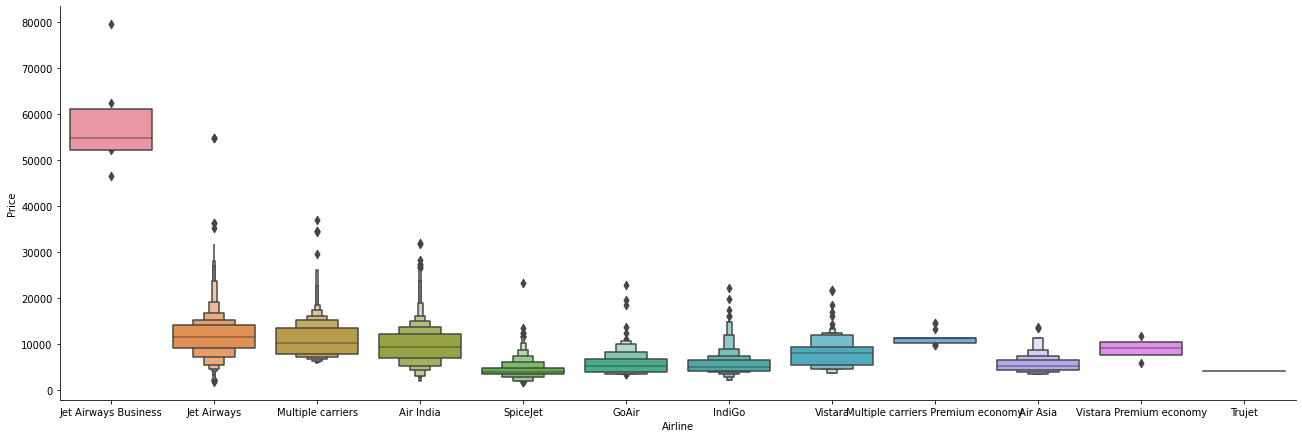

In [54]:
# plot airline vs price

sns.catplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

 - As Airline is the nominal categorical data, we'll perform OneHotEncoding

# **One Hot Encoding**

In [55]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


 - Column has been converted.

# **Source**

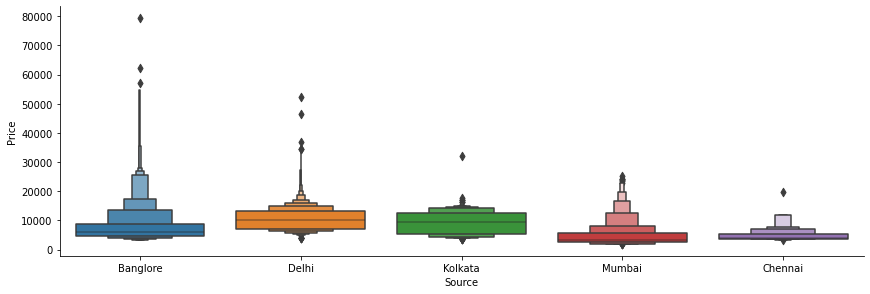

In [57]:
# Source vs Price

sns.catplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=4, aspect=3)
plt.show()

- As Source is the nominal categorical data, we'll perform OneHotEncoding

In [58]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


 - Column has been converted successfully.

# **Destination**

In [59]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

 - As Source is the nominal categorical data, we'll perform OneHotEncoding

In [60]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


 - Column has been converted successfully.

# **Route**

In [61]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

 - "Route" is related to "Total_Stops" column.
 - "Additional_Info" contains almost 80% of No Info data, better to drop it.

In [62]:
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [63]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


 - Both the colummns have been dropped successfully.

# **Total_Stops**

In [64]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

 - "Total_Stops" column is the ordinal categorical type, so we'll perform LabelEncoder.
 - Here, values are assigned with corresponding keys.

In [65]:
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [66]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45


 - "Total_Stops" has been converted.
 - Concatenate DataFrame = train_data + Airline + Source + Destination

In [67]:
train_data = pd.concat([train_data, Airline, Source, Destination],axis=1)

In [68]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


 - Columns added successfully.
 - Therefore, its better to drop Airline, Source, Destination.

In [69]:
# drop column

train_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [74]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


 - Columns have been dropped successfully.
 - We've a proper train_data to feed a model.

In [75]:
# check shape of train_data
train_data.shape

(10682, 30)

## **Test Data**

In [76]:
test_data = pd.read_excel('/content/sample_data/Test_set.xlsx')

In [77]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [78]:
test_data.shape

(2671, 10)

# **Preprocessing on Test Data**

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


 - We have all columns are object type in test data.

In [81]:
# check null
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

 - Our test data don't have any null values .

## **Date_of_Journey**

In [82]:
# convert into interger

test_data['Journey_Day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day

test_data['Journey_Month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [84]:
test_data['Journey_Day']

0        6
1       12
2       21
3       21
4       24
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Journey_Day, Length: 2671, dtype: int64

In [85]:
test_data['Journey_Month']

0       6
1       5
2       5
3       5
4       6
       ..
2666    6
2667    3
2668    3
2669    3
2670    6
Name: Journey_Month, Length: 2671, dtype: int64

In [83]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


 - Column converted and dropped.

# **Dep_Time**

In [87]:
# extract hours
test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

# extract Minutes
test_data['Dep_Min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

# drop column
test_data.drop(['Dep_Time'], axis=1, inplace=True)

In [88]:
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


 - Column converted and dropped.

# **Arrival_Time**

In [89]:
# extract hour
test_data['Arrival_Hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour

# extract min
test_data['Arrival_Min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

# drop column
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

 - Column converted and dropped.

# **Duration**

In [93]:
# converting duration column into list.
duration = list(test_data['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) !=2 : # check if the duration contains only hrs or min
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m' # Adds 0 mins.
    else :
      duration[i] = '0h ' + duration[i]          # Adds 0 hr

duration_hours = []
duration_mins = []

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = 'h')[0]))   # extract hours from duration
  duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # extract min from duration


test_data['Duration_hrs'] = duration_hours
test_data['Duration_mins'] = duration_mins

# drop column
test_data.drop(['Duration'], axis=1, inplace=True)

In [94]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


 - Column converted and dropped.

# **Handling Categorical Variable of Test Data**

# **Airline**

In [98]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [99]:
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


 - Column converted.

# **Source**

In [100]:
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


 - Column converted.

# **Destination**

In [101]:
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


 - Column converted.

In [102]:
# drop Airline, Dource, Destination

test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [103]:
test_data.head()

,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


 - Columns dropped.

# **Route & Additional_Info**

 - "Route" is related to "Total_Stops" column.
 - "Additional_Info" contains almost 80% of No Info data, better to drop it.

In [104]:
# drop both column

test_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [105]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins
0,1 stop,6,6,17,30,4,25,10,55
1,1 stop,12,5,6,20,10,20,4,0
2,1 stop,21,5,19,15,19,0,23,45
3,1 stop,21,5,8,0,21,0,13,0
4,non-stop,24,6,23,55,2,45,2,50


 - Columns dropped.

# **Total_Stops**

In [106]:
# replace values
test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [107]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins
0,1,6,6,17,30,4,25,10,55
1,1,12,5,6,20,10,20,4,0
2,1,21,5,19,15,19,0,23,45
3,1,21,5,8,0,21,0,13,0
4,0,24,6,23,55,2,45,2,50


 - values replaced.

 - Concatenate DataFrame = train_data + Airline + Source + Destination

In [108]:
test_data = pd.concat([test_data, Airline, Source, Destination],axis=1)

In [109]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


 - Columns attached.
 - Now data is ready to feed to a model.

In [110]:
# check shape of test data
test_data.shape

(2671, 28)

# **Feature Selection**

In [111]:
train_data.shape

(10682, 30)

In [112]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hrs',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [127]:
X = train_data.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hrs',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [128]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## **Correlation between independent and dependent attributes**

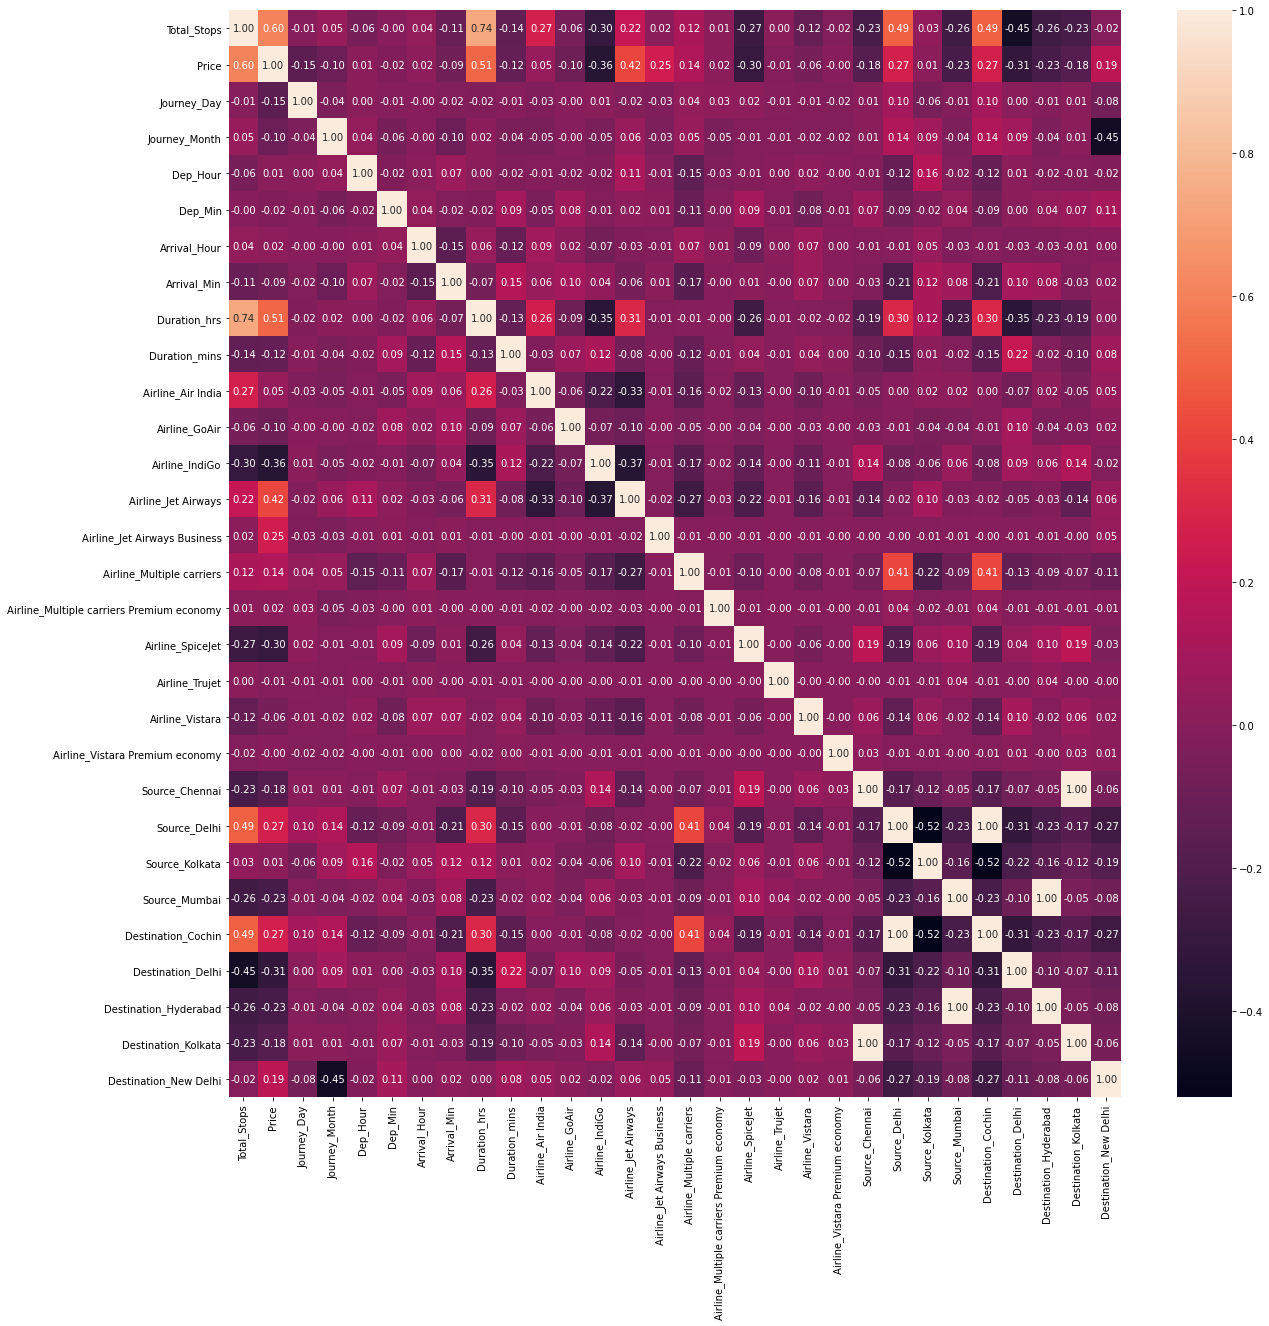

In [129]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f')

plt.show()

In [130]:
# Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [131]:
print(selection.feature_importances_)

[2.28653330e-01 1.42378800e-01 5.44428239e-02 2.44806366e-02
 2.14924040e-02 2.82423344e-02 1.92014018e-02 1.32064609e-01
 1.79379284e-02 9.79396108e-03 1.90808452e-03 1.77048613e-02
 1.33620107e-01 6.74015626e-02 2.06034048e-02 9.31817929e-04
 3.32164107e-03 9.66607998e-05 5.28821502e-03 8.11335384e-05
 5.09578066e-04 9.02584904e-03 3.23702789e-03 5.47471831e-03
 8.89807607e-03 1.22031845e-02 5.79892662e-03 4.76619131e-04
 2.47303027e-02]


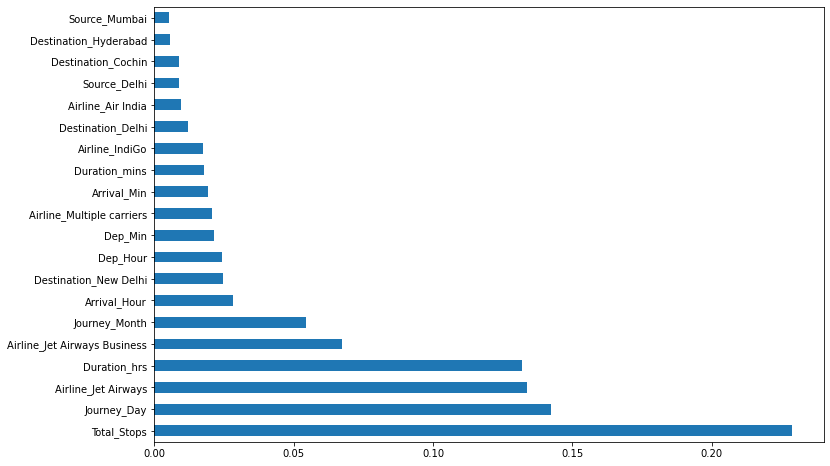

In [132]:
# plot grapn of feature importances using visualization

plt.figure(figsize=(12,8))
feature_importances = pd.Series(selection.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

# **Fit The Model using Random Forest**

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=481638)

In [134]:
from sklearn.ensemble import  RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [135]:
y_pred = reg_rf.predict(X_test)

In [136]:
reg_rf.score(X_train, y_train)

0.9575357633602488

In [137]:
reg_rf.score(X_test, y_test)

0.8103879937040112

 - We got the score for train is 95% and for test is 81%.

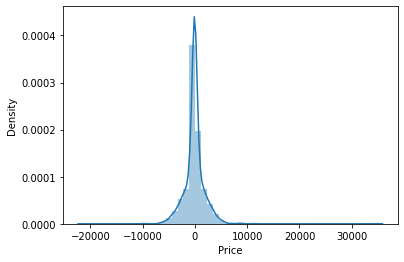

In [140]:
sns.distplot(y_test-y_pred)
plt.show()

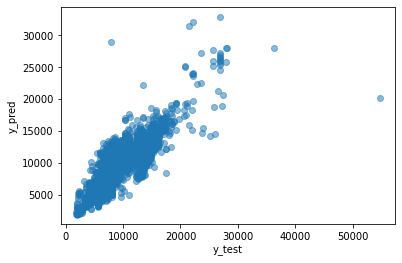

In [141]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [142]:
from sklearn import metrics

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1186.7477760512413
MSE: 3800716.033778798
RMSE: 1949.542519100006


In [146]:
metrics.r2_score(y_test, y_pred)

0.8103879937040113

 - The score is 81%.

## **Hyper Parameter Tuning**

In [147]:
from sklearn.model_selection import RandomizedSearchCV


In [148]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [149]:
# create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
               'max_features' : max_features,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

In [152]:
# random search of parameters using 5 fol cross validation
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=48415, n_jobs=1)

In [153]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   8.6s
[CV] n_estimators=800, min_sampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [154]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 900}

In [155]:
prediction = rf_random.predict(X_test)

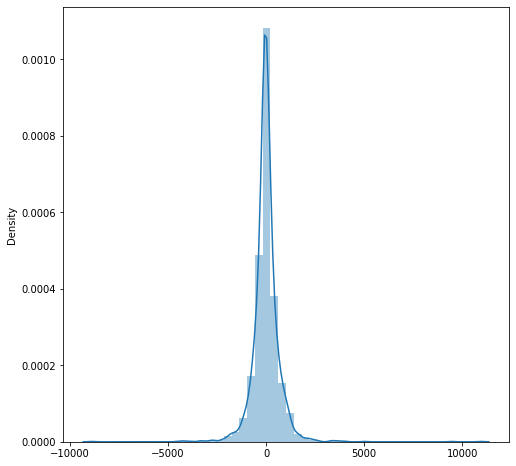

In [157]:
plt.figure(figsize=(8,8))
sns.distplot(y_pred-prediction)
plt.show()

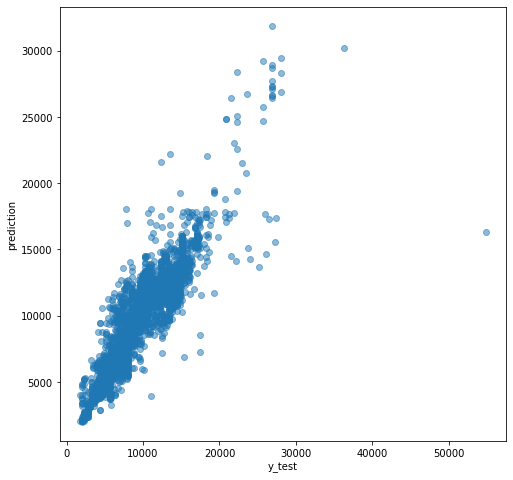

In [158]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [159]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1191.0595016364396
MSE: 3526659.3142898153
RMSE: 1877.9401785706102


# **Save the model**

In [160]:
import pickle

# open a file
file = open('Flight_Price_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [161]:
model = open('Flight_Price_prediction.pkl', 'rb')
forest = pickle.load(model)

In [162]:
y_prediction = forest.predict(X_test)

In [163]:
metrics.r2_score(y_test, y_prediction)

0.8103879937040113

 - Our model has been saved and r2_score is 81%.